In [478]:
import numpy as np
from matplotlib import pyplot as plt

In [479]:
def tanh_grad(input, transpose=False):
    grad = 1 - np.power(input, 2)
    if transpose:
        return grad.T
    return grad

In [480]:
def loss_fn(input, target, grad=False):
    if grad:
        return input - target
    return np.sum(0.5 * np.power(input - target, 2))

In [481]:
class Layer:
    def __init__(self, n_inputs, n_outputs, activation=None):
        self.w = np.random.randn(n_inputs, n_outputs)
        self.b = np.random.randn(n_outputs, 1)
        self.activation = activation

    def __call__(self, input):
        return self.forward(input)

    def forward(self, input):
        x = np.matmul(self.w.T, input) + self.b
        if self.activation:
            x = self.activation(x)
        return x

In [489]:
class NeuralNetwork:
    def __init__(self, n_inputs, n_outputs, loss_fn=loss_fn):
        self.layer1 = Layer(n_inputs, 4, np.tanh)
        self.layer2 = Layer(4, n_outputs)
        self.outputs = []
        self.losses = []
        
    def forward(self, input):
        x1 = self.layer1(input)
        x2 = self.layer2(x1)
        self.outputs = [input, x1, x2]
        return x2
    
    def compute_deltas(self, input, target):
        delta_k = loss_fn(input, target, grad=True)
        delta_j = np.dot(
            tanh_grad(self.outputs[1], transpose=False),
            np.sum(np.dot(self.layer2.w, delta_k)))
        return delta_k, delta_j
    
    def backward(self, deltas, lr=1e-3):
        delta_k, delta_j = deltas
        grad = np.dot(self.outputs[1], delta_k.T)
        self.layer2.w = self.layer2.w - lr * grad
        self.layer2.b = self.layer2.b - lr * delta_k

        grad = np.dot(self.outputs[0], delta_j.T)
        self.layer1.w = self.layer1.w - lr * grad
        self.layer1.b = self.layer1.b - lr * delta_j
        
    def __call__(self, input, target):
        x = self.forward(input)
        deltas = self.compute_deltas(x, target)
        self.losses.append(loss_fn(x, target))
        self.backward(deltas)

In [490]:
x = np.linspace(0, 1, 32).reshape(-1, 1)
x = np.hstack((x, x))

alpha = np.array([4, 3]).reshape(-1, 1)
beta = 4
y = np.dot(x, alpha) + beta 

In [491]:
model = NeuralNetwork(2, 1)
for epoch in range(1000):
    for input, target in zip(x, y):
        input = input.reshape(-1, 1)
        target = target.reshape(-1, 1)
        model(input, target)

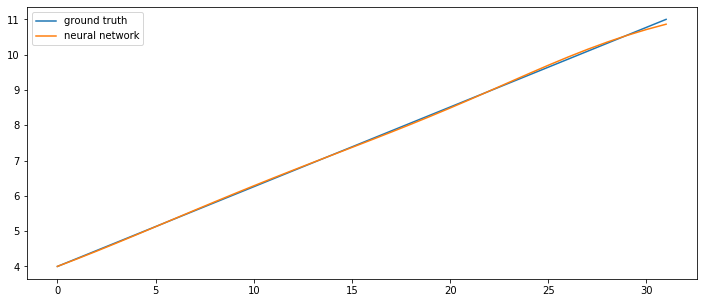

In [492]:
preds = [model.forward(input.reshape(-1, 1)).squeeze() for input in x]
plt.figure(figsize=(12, 5))
plt.plot(np.arange(len(y)), y, label='ground truth')
plt.plot(np.arange(len(y)), preds, label='neural network')
plt.legend()

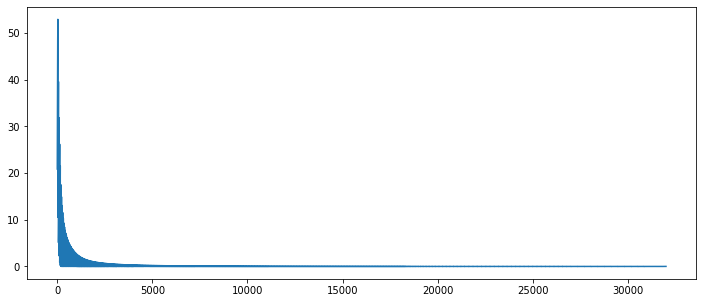

In [494]:
plt.figure(figsize=(12, 5))
plt.plot(np.arange(len(model.losses)), model.losses)